In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the data set

tv_shows_df = pd.read_csv('../csv/tv_shows_data_cleaned.csv')
tv_shows_df.head()

,id,name,original_name,genre_name,number_of_seasons,number_of_episodes,first_air_date,last_air_date,in_production,popularity,...,vote_count,origin_country,original_language,overview,tagline,creator_names,production_names,production_logo_paths,production_origin_countries,poster_path
0,25,Star Wars: Droids,Star Wars: Droids,"Kids, Animation, Action & Adventure, Sci-Fi & ...",1,13,1985-09-07,1985-11-30,False,11.592,...,66,"[""CA"",""US""]",en,An animated television series that features th...,NaN,"['George Lucas', 'Ben Burtt', 'Clive A. Smith'...","['Lucasfilm Animation', 'Lucasfilm Ltd.']","['/eDWGeg5tdVNcI8aBaaJ21bEBtFa.png', '/o86Dbpb...","['US', 'US']",/b3gsZSTauRBJDJvWCbD9oVAsFe1.jpg
1,29,"Mary Hartman, Mary Hartman","Mary Hartman, Mary Hartman","Drama, Soap, Comedy",2,307,1976-01-05,1977-03-10,False,14.367,...,8,"[""US""]",en,"In the fictional town of Fernwood, Ohio, subur...",NaN,"['Gail Parent', 'Norman Lear', 'Ann Marcus', '...",['TAT Communications Company'],[None],[''],/O1bcYEBW8v7JOMNVpYOBTL6PjL.jpg
2,55,North of 60,North of 60,Drama,6,95,1992-12-03,2005-01-30,False,5.742,...,42,"[""CA""]",en,North of 60 is a mid-1990s Canadian television...,NaN,NaN,NaN,NaN,NaN,/twsoO8NCTitfW4My9wKz2p5yJou.jpg
3,65,The Job,The Job,"Drama, Comedy",2,19,2001-03-14,2002-04-24,False,6.335,...,53,"[""US""]",en,Mike McNeil is a decorated New York City detec...,NaN,"['Denis Leary', 'Peter Tolan']","['The Cloudland Company', 'Apostle', 'Touchsto...","[None, None, '/wwaKUcOENHix2jxLfFBfNkCtOEQ.png...","['US', 'US', 'US', 'US']",/iDiiIBZCjdihpBoDKzVRhb7C9B.jpg
4,70,This Hour Has 22 Minutes,This Hour Has 22 Minutes,"News, Comedy",30,386,2009-09-28,2023-02-21,True,15.032,...,46,"[""CA""]",en,This Hour Has 22 Minutes is a weekly Canadian ...,NaN,"['Mary Walsh', 'Rick Mercer']",NaN,NaN,NaN,/7sP1tv9e2wZzdOATVZxtZN3DUbi.jpg


In [3]:
tv_shows_df.columns

Index(['id', 'name', 'original_name', 'genre_name', 'number_of_seasons',
       'number_of_episodes', 'first_air_date', 'last_air_date',
       'in_production', 'popularity', 'vote_average', 'vote_count',
       'origin_country', 'original_language', 'overview', 'tagline',
       'creator_names', 'production_names', 'production_logo_paths',
       'production_origin_countries', 'poster_path'],
      dtype='object')

In [4]:
tv_shows_df.sort_values('popularity', ascending=False)[['name', 'popularity']]


,name,popularity
4501,Judy Justice,649.708
129,The Simpsons,639.304
4264,The Last of Us,610.799
3760,The Mandalorian,520.203
2670,The Flash,497.315
...,...,...
2268,Kenny Hotz's Triumph of the Will,0.600
1943,In Search of the Trojan War,0.600
1916,The Grammy Awards,0.600
1826,Big Brother Brasil,0.600


# Top 10 TV Shows by Popularity

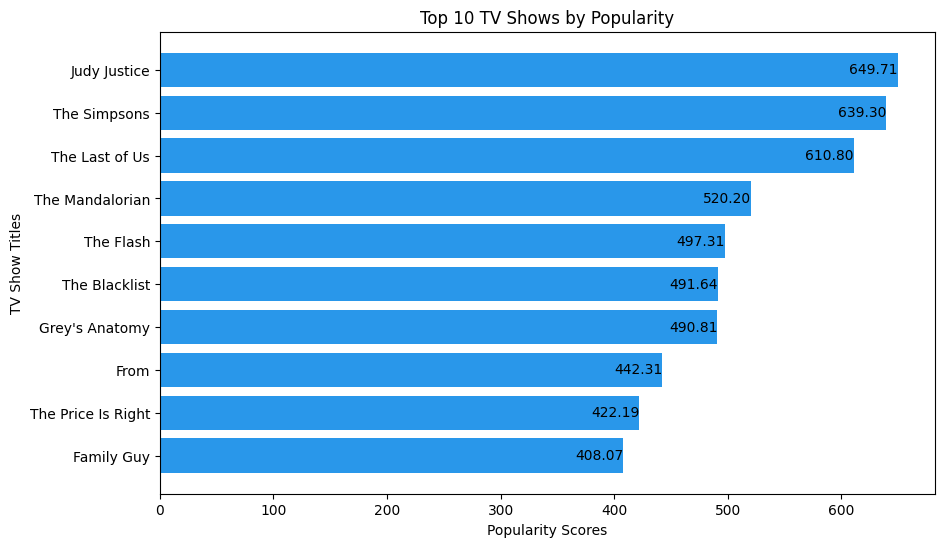

In [5]:
# Sort the DataFrame by popularity in ascending order
sorted_shows = tv_shows_df.sort_values('popularity')

# Select the top 10 TV shows
top_10_shows = sorted_shows.nlargest(10, 'popularity')

# Reverse the order of the TV show titles and popularity scores
show_titles = top_10_shows['name'][::-1]
popularity_scores = top_10_shows['popularity'][::-1]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(show_titles, popularity_scores, color='#2997EA')
plt.xlabel('Popularity Scores')
plt.ylabel('TV Show Titles')
plt.title('Top 10 TV Shows by Popularity')

# Add popularity scores as labels on each bar
for i, score in enumerate(popularity_scores):
    plt.text(score, i, f'{score:.2f}', ha='right', va='center')

# Save the chart as an image file
plt.savefig('../graphs/tv_shows_top_10_by_popularity.png', dpi=400, bbox_inches='tight')

# Display the chart
plt.show()


# Top 10 TV Shows by Weighted Scores

Weighted Score = (v / (v + m)) * R + (m / (v + m)) * C

where:

v is the number of votes or ratings received for the movie or TV show
m is a minimum threshold for the number of votes required to be considered for ranking
R is the average rating or vote average of the movie or TV show
C is the mean vote average across the entire dataset
The purpose of the weighted score formula is to give more weight to movies or TV shows with a higher number of votes while considering the average rating.

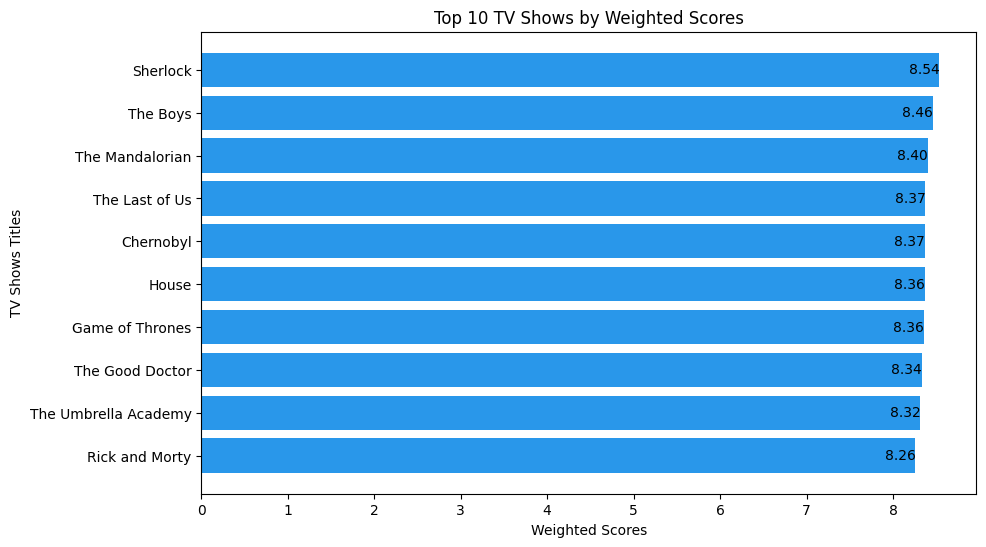

In [6]:
# Define the minimum number of votes required to be listed (threshold)
m = 1000

# Calculate the mean vote across the whole dataset
C = tv_shows_df['vote_average'].mean()

# Calculate the weighted scores for each TV show
tv_shows_df['weighted_score'] = (tv_shows_df['vote_count'] / (tv_shows_df['vote_count'] + m)) * tv_shows_df['vote_average'] + (m / (tv_shows_df['vote_count'] + m)) * C

# Sort the DataFrame by weighted score in descending order
tv_shows_df = tv_shows_df.sort_values('weighted_score', ascending=False)

# Select the top 10 TV shows with the highest weighted scores
top_10_tv_shows = tv_shows_df.head(10)

# Extract the TV show titles and weighted scores for the top 10 TV shows
tv_shows_titles = top_10_tv_shows['name']
weighted_scores = top_10_tv_shows['weighted_score'].sort_values(ascending=True)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(tv_shows_titles, weighted_scores, color='#2997EA')
plt.xlabel('Weighted Scores')
plt.ylabel('TV Shows Titles')
plt.title('Top 10 TV Shows by Weighted Scores')

# Add weighted scores as labels on each bar
for i, bar in enumerate(bars):
    score = weighted_scores.values[i]
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{score:.2f}', ha='right', va='center')

# Save the chart as an image file
plt.savefig('../graphs/tv_shows_weighted_scores_chart.png', dpi=400, bbox_inches='tight')

# Display the chart
plt.show()



# TV Shows Genre Distribution by Count

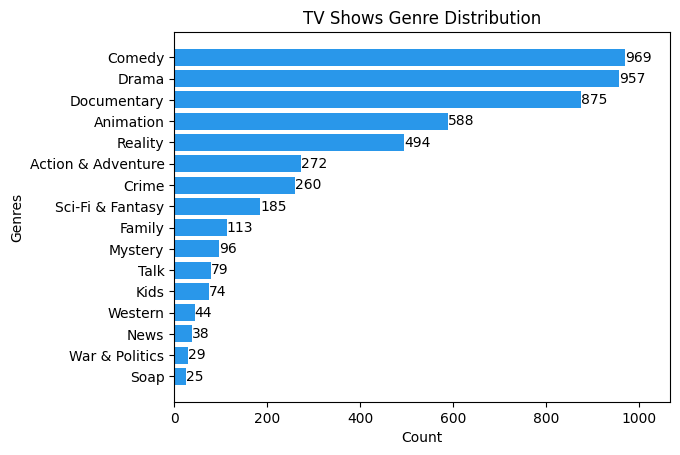

In [7]:
tv_shows_df['first_genre'] = tv_shows_df['genre_name'].str.split(',').str[0]

unique_genres = tv_shows_df['first_genre'].unique().tolist()

genre_counts = tv_shows_df['first_genre'].value_counts()
genre_counts = genre_counts.sort_values(ascending=True)

plt.barh(genre_counts.index, genre_counts.values, color='#2997EA')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.title('TV Shows Genre Distribution')

# Add count values as labels on the right side of the bars
for i, count in enumerate(genre_counts.values):
    plt.text(count, i, str(count), ha='left', va='center')

# Adjust the x-axis limits to provide space for labels within the chart frame
plt.xlim(right=max(genre_counts.values) * 1.1)

plt.savefig('../graphs/tv_shows_genre_distribution_chart.png', dpi=400, bbox_inches='tight')
plt.show()


# TV Shows Genre Distribution by Weighted Score

In [8]:
genre_weighted_scores = tv_shows_df.groupby('first_genre')['weighted_score'].mean()
genre_weighted_scores = genre_weighted_scores.sort_values(ascending=True)


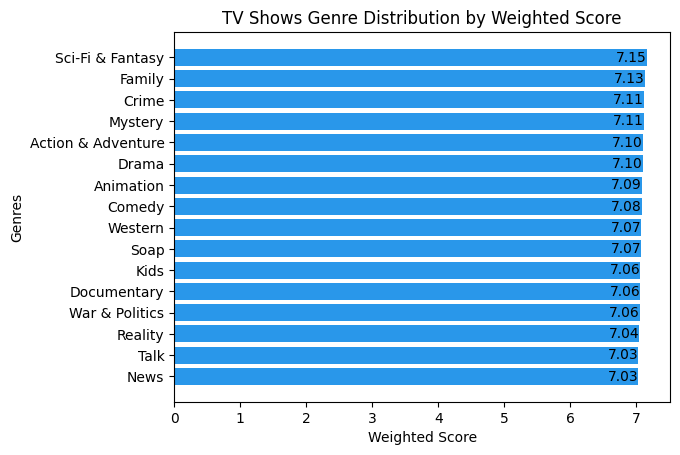

In [9]:
plt.barh(genre_weighted_scores.index, genre_weighted_scores.values, color='#2997EA')
plt.xlabel('Weighted Score')
plt.ylabel('Genres')
plt.title('TV Shows Genre Distribution by Weighted Score')

# Add mean values as labels on each bar
for i, score in enumerate(genre_weighted_scores.values):
    plt.text(score, i, f'{score:.2f}', ha='right', va='center')

plt.savefig('../graphs/tv_shows_genre_distribution_by_weighted_score.png', dpi=400, bbox_inches='tight')

plt.show()
